<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/MariesGradientenBilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File ‘utils_bv.py’ already there; not retrieving.



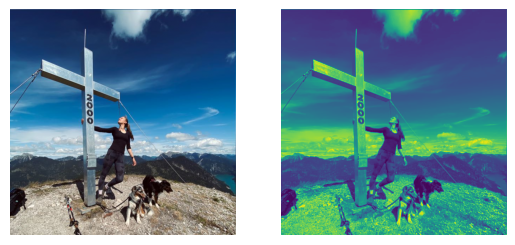

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
!wget -nc https://raw.githubusercontent.com/ollihansen90/zeugs/main/utils/utils_bv.py
import utils_bv
from matplotlib import colormaps

# URL zum Bild im Internet (mehrere Beispiele)
#url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAp6sh8HwnJLt3shyZ7rg9HfW6IW7rfXZWpA&usqp=CAU"
#url = "https://upload.wikimedia.org/wikipedia/commons/1/12/Baby_Owls.jpg"
#url = "https://www.bmel.de/SharedDocs/Bilder/DE/_Landwirtschaft/Schafsherde.jpg?__blob=wide&v=3"
#url = "https://img.freepik.com/fotos-premium/reizendes-fruehlingsbild-eines-niedlichen-schwarzweiss-border-collie-in-einem-bluehenden-park_410516-41804.jpg"
#url = "https://www.lbv.de/files/user_upload/Bilder/Arten/Tiere/Vogel%20von%20A-Z/Eulen%20und%20Kauze/Rauhfusskauz/NP-Bayerischer-Wald_Zwieselter-Filz_Raufusskauz-Dr-Christoph-Moning-3.jpg"
url = "https://media-ham3-1.cdn.whatsapp.net/v/t61.24694-24/371529394_235771709006924_4401559105526083424_n.jpg?ccb=11-4&oh=01_AdTFdSiscWbagNO-6QIYdZhAWxHxDPPEuNhYIHh6r8DZ_A&oe=65F69499&_nc_sid=e6ed6c&_nc_cat=109"

# Bild Normalisieren
downsample = 1 # für große Bilder zum Runtersamplen, einfach ein beliebiger Integer-Wert
img = np.array(io.imread(url)).astype(float)[::downsample, ::downsample]
img -= np.min(img)
img /= np.max(img)

# Grayscale-Transformation
m = np.array([0.2126, 0.7152, 0.0722])
img_gray = (img@m)[...,None]

# Bild anzeigen
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_gray)
plt.axis("off")
plt.show()

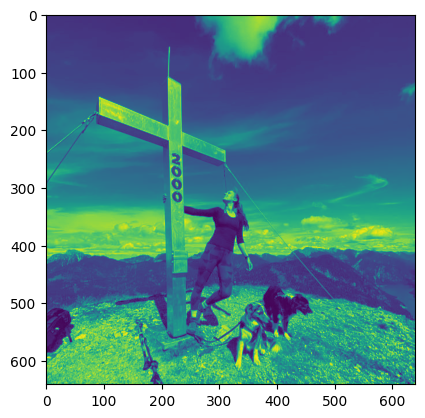

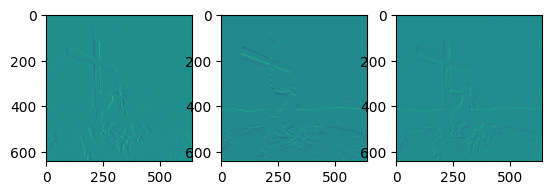

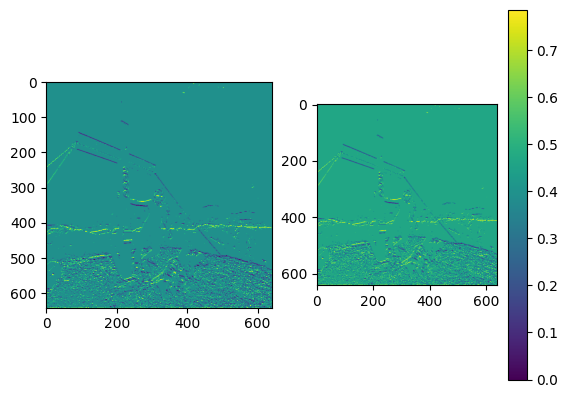

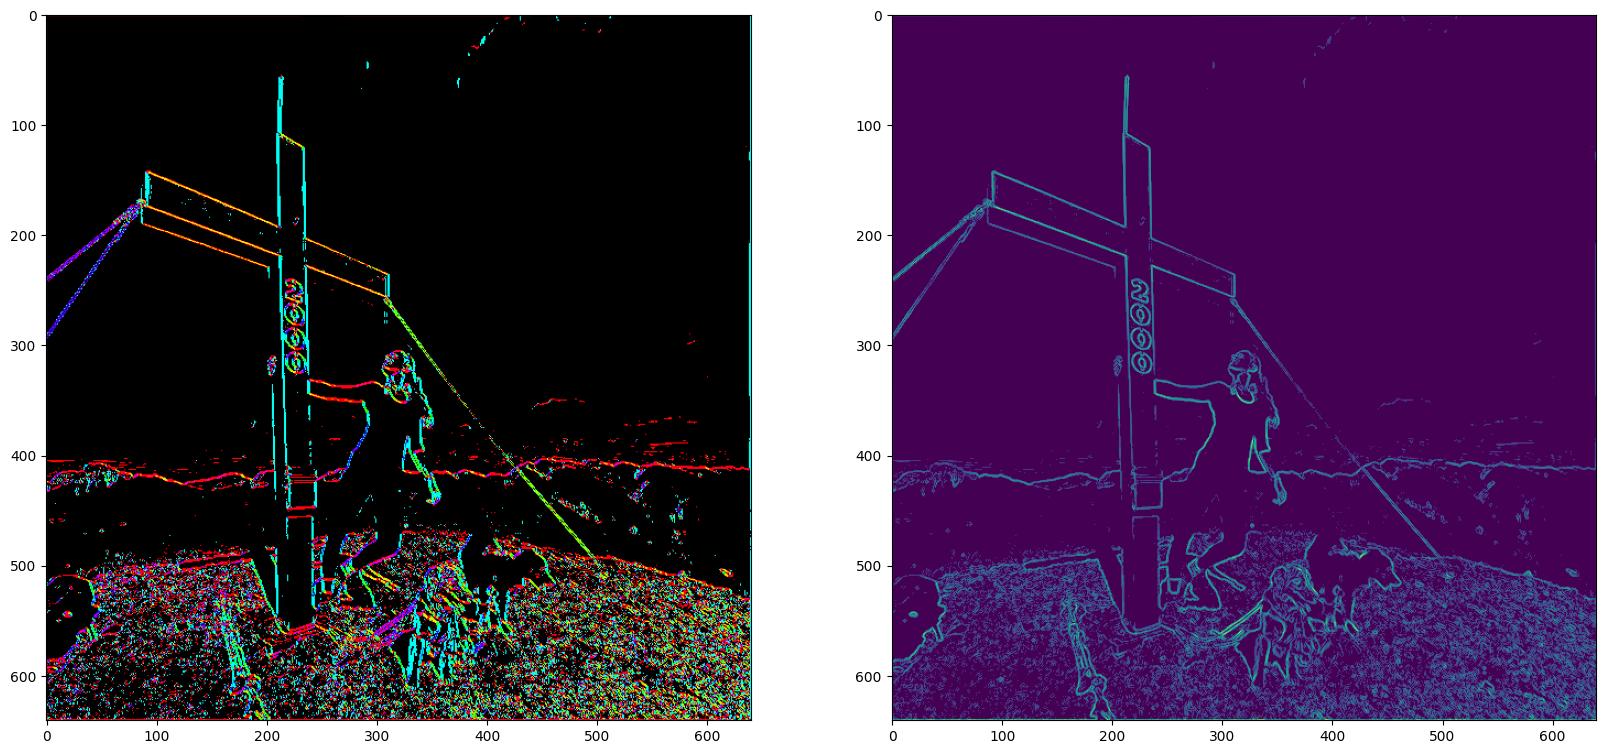

In [35]:
if False: # Testbilder: Kreis oder Quadrat
    base = np.linspace(-1,1, num=1000)
    img_gray = np.ones([100,100])
    img_gray[:20] = 0
    img_gray[-20:] = 0
    img_gray[:,:20] = 0
    img_gray[:,-20:] = 0
    img_gray = np.exp(-base**2)[:,None]*np.exp(-base**2)[None]
    img_gray[img_gray<0.5] = 0
    img_gray[img_gray>=0.5] = 1
    img_gray = img_gray[...,None]

plt.figure()
plt.imshow(img_gray)
plt.show()

# Kantenfilter g_x und g_y
#g_x = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
g_x = np.array([[0,0,0], [1,0,-1], [0,0,0]])
g_y = g_x.copy().T

# Faltungen für Gradientenbilder G_x und G_y
img_x = utils_bv.conv2d(img_gray, g_x)
img_y = utils_bv.conv2d(img_gray, g_y)
# zu kleine Gradienten auf 0 setzen (0.15 ist vermutlich etwas sehr groß)
img_x[np.abs(img_x)<0.15] = 0
img_y[np.abs(img_y)<0.15] = 0

# Gradienten aneinanderpappen (man kann auch mit img_x und img_y weiterarbeiten)
img_xy = np.stack([img_x, img_y], axis=-1)

# Magnitudenbild (Länge der Gradientenvektoren [g_x[i,j], g_y[i,j]] für alle i, j)
img_lens = np.sqrt(img_x**2+img_y**2)

# Gradientenvektoren normalisieren, da uns nur die Richtung und nicht die Länge interessiert
img_xy /= img_lens[...,None]+1e-10

# img_v ist der Arcustangens des Quotienten der Gradienten in x- und y-Richtung
img_v = np.arctan(img_xy[...,1]/(img_xy[...,0]+1e-8)).squeeze()
# Werte von img_v auf [0,1] normalisieren
img_v -= np.min(img_v)
img_v /= np.max(img_v)

# Hübsche Farben :-)
img_v_color = colormaps["hsv"](img_v)
# alle zu kurzen Vektoren durch Schwarz austauschen
img_v_color[img_lens.squeeze()<0.01] = np.array([0,0,0,1])

# Alle möglichen Bilder plotten
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_x)
plt.subplot(1,3,2)
plt.imshow(img_y)
plt.subplot(1,3,3)
plt.imshow(img_y+img_x)
plt.show()
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_v)
plt.subplot(1,2,2)
plt.imshow((np.arctan(img_v)))
plt.colorbar()
plt.show()

# Das hier ist das Ergebnis
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(img_v_color)
plt.subplot(1,2,2)
plt.imshow(img_lens.squeeze())
plt.show()

# Möglicher nächster Schritt: img_v_color pixelweise als "Datensatz" aufstellen
# (z.b. durch np.reshape(img_v_color, (-1, 3))) und k-Means anwenden, um
# um bestimmte Richtungen zu quantisieren (das ist beispielsweise sinnvoll, wenn
# man "Ringe" sucht ;-)).

[-0.] [1. 0. 0. 1.]
[-1.] [0.] [-0.] [-0.]
(20, 20, 1, 4)


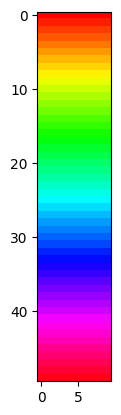

3.141572653589794


In [26]:
# Debugging-Gedöhns, nicht mehr wichtig für den Algorithmus
i,j = 10,1
print(np.arctan(img_v)[i,j], img_v_color[i,j])
test = img_y[i,j]/(img_x[i,j]+1e-8)
print(img_x[i,j], img_y[i,j], test, np.arctan(test))

print(colormaps["jet"](img_v).shape)
plt.figure()
plt.imshow(np.linspace(-1,1)[:,None]*np.ones(10)[None], cmap="hsv")
plt.show()
print(np.arctan(100000)*2)